## Desafío - Clasificación desde Machine Learning

<br>

Nombre: Julio Valdés

Profesor: Gabriel Tamayo

Generación: G5

* Para poder realziar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : Total de saldo en la cuenta de crédito (deuda).
* student : Variable binaria. Registra si el cliente es estudiante o no

### Desafío 1: Preparación del ambiente de trabajo

* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler , classification_report y roc_curve de sklearn
* Importe el archivo default_credit.csv

In [70]:
# módulos básicos para el análisis de datos
import numpy as np
import pandas as pd
# seaborn 
import matplotlib.pyplot as plt
import seaborn as sns
# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 6)

df = pd.read_csv('default_credit.csv').drop("index", axis=1)

### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    * Un boxplot del balance total de las cuentas, segmentado por el status de default.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.
* tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.

Text(0.5, 1.0, 'Ingreso por status de default')

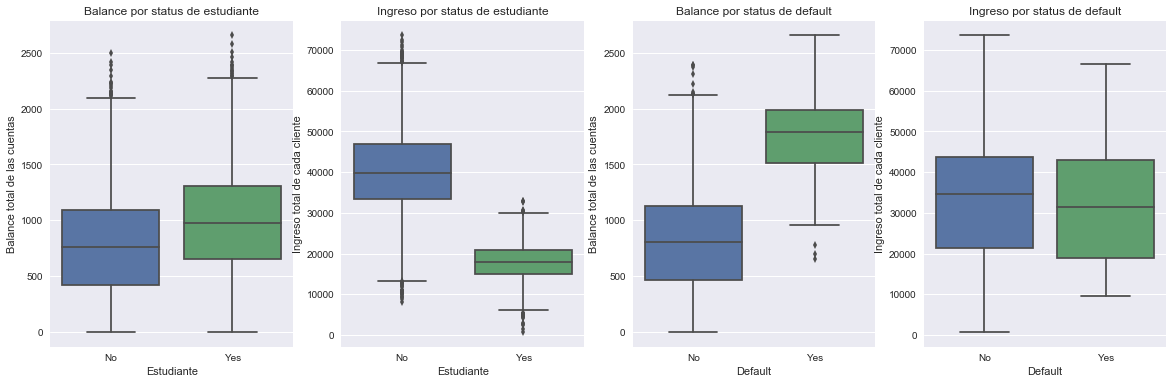

In [71]:
plt.subplot(1, 4, 1)
sns.boxplot(df['student'], df['balance'])
plt.xlabel('Estudiante')
plt.ylabel('Balance total de las cuentas')
plt.title('Balance por status de estudiante')
plt.subplot(1, 4, 2)
sns.boxplot(df['student'], df['income'])
plt.xlabel('Estudiante')
plt.ylabel('Ingreso total de cada cliente')
plt.title('Ingreso por status de estudiante')
plt.subplot(1, 4, 3)
sns.boxplot(df['default'], df['balance'])
plt.xlabel('Default')
plt.ylabel('Balance total de las cuentas')
plt.title('Balance por status de default')
plt.subplot(1, 4, 4)
sns.boxplot(df['default'], df['income'])
plt.xlabel('Default')
plt.ylabel('Ingreso total de cada cliente')
plt.title('Ingreso por status de default')

Text(0.5, 1.0, 'Balance vs Income por status de estudiante')

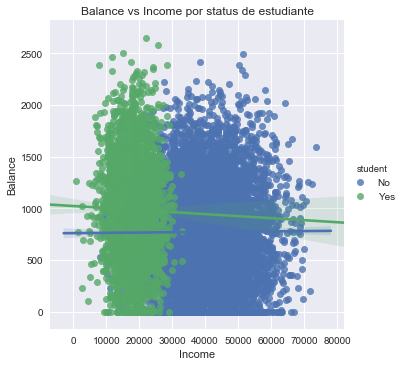

In [72]:
sns.lmplot('income','balance', df, hue = 'student')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.title('Balance vs Income por status de estudiante')

Text(0.5, 1.0, 'Balance vs Income por status de default')

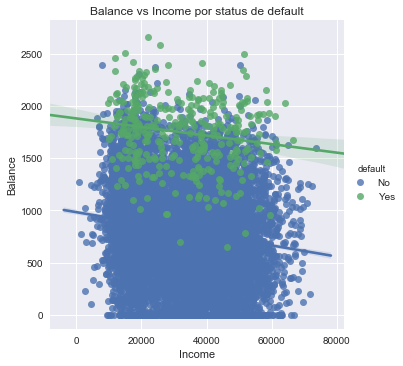

In [22]:
sns.lmplot('income','balance', df, hue = 'default')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.title('Balance vs Income por status de default')

### Comentarios
* La deuda promedio de los clientes es mayor en el grupo de estudiantes y presenta una variabilidad similar en ambos grupos.
* El ingreso promedio de los clientes es significativamente menor en el grupo de estudiantes y presenta una variabilidad menor en este grupo en relación al grupo de clientes no estudiantes.
* La deuda promedio de los clientes es mayor en el grupo de clientes con morosidad y presenta una variabilidad menor en este grupo en relación al grupo de clientes no morosos.
* El ingreso promedio de los clientes  y la variabilidad son similares en los grupos de morosos y no morosos.
* Al observar el gráfico de dispersión segmentado por status de estudiante se observa que el grupo de clientes estudiantes presenta un ingreso menor que el grupo de clientes no estudiantes. Además se observa que la deuda varía de manera similar independiente si el cliente es estudiante o no. No existe una correlación clara entre la deuda y el ingreso de cada cliente.
* Al observar el gráfico de dispersión segmentado por status de default se observa que el grupo de clientes morosos presenta una deuda mayor que el grupo de clientes no morosos. Además se observa que el ingreso varía de manera similar independiente si el cliente se encuentra moroso o no. Existe una correlación inversamente proporcional en los grupos de clientes morosos y no morosos que indica que a mayor ingreso es menor la deuda de cada cliente.

### Desafío 3: Modelación econométrica
Recodifique las variables student y default para que adquieran atributos numéricos.
Implemente el siguiente modelo econométrico:


$$\log\left(\frac{p({default=1})}{1 - p({default=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {balance} +{\beta }_{2} \cdot {income}+{\beta }_{3} \cdot {student} }$$


A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [74]:
df['is_student'] = np.where(df['student'] == 'Yes', 1, 0)
df['is_default'] = np.where(df['default'] == 'Yes', 1, 0)
m1_logit = smf.logit('is_default ~ balance + income + is_student', df).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        21:46:05   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
is_student    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Para optimizar el modelo consideramos las variables con significancia estadística al 95%.
#### El nuevo modelo es el siguiente:

$$\log\left(\frac{p({default=1})}{1 - p({default=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {balance} +{\beta }_{2} \cdot {student} }$$


In [75]:
m2_logit = smf.logit('is_default ~ balance + is_student', df).fit()
m2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        21:46:15   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
is_student    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
def invlogit(x):
    return 1 / (1 + np.exp(-x))

mean = df.mean()
estimate_y1 = m2_logit.params['Intercept'] + m2_logit.params['balance'] * mean['balance'] 
estimate_y2 = m2_logit.params['Intercept'] + m2_logit.params['balance'] * mean['balance'] + m2_logit.params['is_student']
pr1 = invlogit(estimate_y1)
pr2 = invlogit(estimate_y2)
print("La diferencia en la probabilidad de estar moroso para alguien con deuda promedio siendo estudiante y no estudiante es de {}".format(round(pr2-pr1, 3)))

estimate_y3 = m2_logit.params['Intercept'] + m2_logit.params['balance'] * df['balance'].min() + m2_logit.params['is_student'] * mean['is_student']
estimate_y4 = m2_logit.params['Intercept'] + m2_logit.params['balance'] * df['balance'].max() + m2_logit.params['is_student'] * mean['is_student']
pr3 = invlogit(estimate_y3)
pr4 = invlogit(estimate_y4)
print("La diferencia en la probabilidad de estar moroso para alguien con una deuda baja y alguien con una deuda alta es de {}".format(round(pr4-pr3, 3)))

print("Se puede concluir que la deuda de un cliente influye significativamente en la probabilidad de estar moroso y no así su condición de estudiante.")

La diferencia en la probabilidad de estar moroso para alguien con deuda promedio siendo estudiante y no estudiante es de -0.001
La diferencia en la probabilidad de estar moroso para alguien con una deuda baja y alguien con una deuda alta es de 0.986
Se puede concluir que la deuda de un cliente influye significativamente en la probabilidad de estar moroso y no así su condición de estudiante.


### Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
* Estandarize la matriz de atributos.
* Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
*  Implemente el modelo sin alterar los hiperparámetros.
*  Genere la predicción de las clases y de la probabilidad.
*  Reporte las métricas de precision, recall y f1 para ambas clases.
*  Grafique la curva Receiver Operator Characteristic.

En base a los pasos, comente sobre el desempeño predictivo del modelo.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3186
           1       0.76      0.32      0.45       114

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.87      0.66      0.72      3300
weighted avg       0.97      0.97      0.97      3300

El área bajo la curva es de 0.6603974625830111


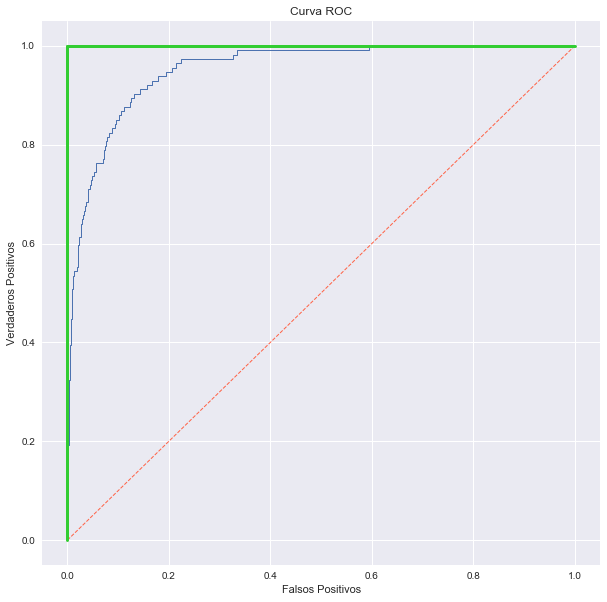

In [65]:
import warnings
warnings.filterwarnings("ignore")

# Se estandariza la matriz de atributos
std_matrix = StandardScaler().fit_transform(df.loc[:, ['balance', 'is_student']])
# Se genera subconjuntos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(std_matrix, df['is_default'], test_size=.33, random_state=11238)
# Se implementa modelo
default_model = LogisticRegression().fit(X_train, y_train)
# Se genera prediccion de las clases
yhat = default_model.predict(X_test)
# Se genera prediccion de la probabilidad
yhat_pr = default_model.predict_proba(X_test)[:, 1]
# Se imprimen metricas de precision para ambas clases
print(classification_report(y_test, yhat))
# Se grafica la curva ROC
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
plt.figure(figsize=(10, 10))
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1, c='tomato')
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, yhat)
print("El área bajo la curva es de {}".format(auc_score))

#### Comentarios:
* La curva ROC nos indica que el modelo presenta una capacidad predictiva adecuada al encontrarse la curva ROC muy por encima de la bisectriz, cercana a las líneas verdes.
* Por otro lado el área bajo la curva (auc) nos indica que el modelo puede ser mejorado, siendo sólo un 16% superior a un mecanismo de clasificación aleatoria.
* Al observar las métricas se observa que para la clase 1 los indicadores son de calidad deficiente, con poca capacidad para generalizar. Esto puede ser consecuencia de que se cuenta con pocos datos para entrenar y validar la clase 1 (3% del total)